# Exercise 3.2

BEGIN: I wrote this code personally without assistance. Any fragments taken from external sources will be explicitly marked.

To complete this exercise, firstly I plotted the histograms for all files to identify the file with a distinctive pattern of amplitude modulation (AM) in the ultrasonic range of frequencies. Then, I've applied the high-pass filter to remove the low-frequency components and plotted the spectrogram of the filtered signal. Finally, I've applied the envelope detection using Hilbert transform and normalize the result to the real number range [0, 1]. The result is recognizable as a human voice saying "1891".

In [251]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from IPython.display import Audio

A list of files for investigation:

In [252]:
audio_files = [
    'sounds/Ex3_sound1.wav',
    'sounds/Ex3_sound2.wav',
    'sounds/Ex3_sound3.wav',
    'sounds/Ex3_sound4.wav',
    'sounds/Ex3_sound5.wav',
]

In [253]:
def show_spectogram(sig, sr):
    """
    This is a helper function to display a spectrogram of a given signal (sig) with a given sampling rate (sr).
    """

    spectrum = np.abs(librosa.stft(sig))

    # Display the spectrum
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrum, ref=np.max), sr=sr, x_axis='time', y_axis='linear', cmap='hot')

    plt.title('Spectrum of ' + audio_file)
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [254]:
def high_pass_filter(sig, sr, cutoff):
    """
    This is a helper function to apply a high-pass filter to a given signal (signal) with a given sampling rate (sr) and cutoff frequency (cutoff).
    """

    # Create a high-pass filter
    b, a = signal.butter(5, cutoff, btype='highpass', fs=sr)

    # Apply the filter to the signal
    return signal.filtfilt(b, a, sig)

Let's load all the files and display spectrograms for each of them:

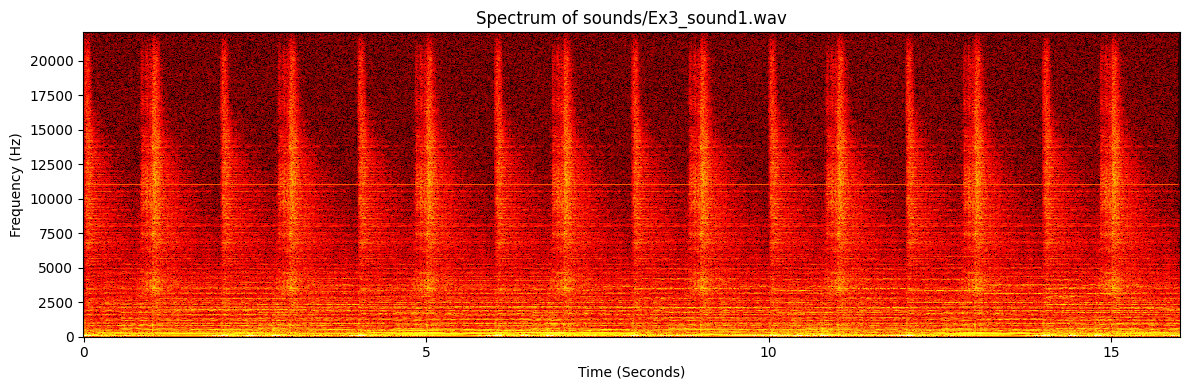

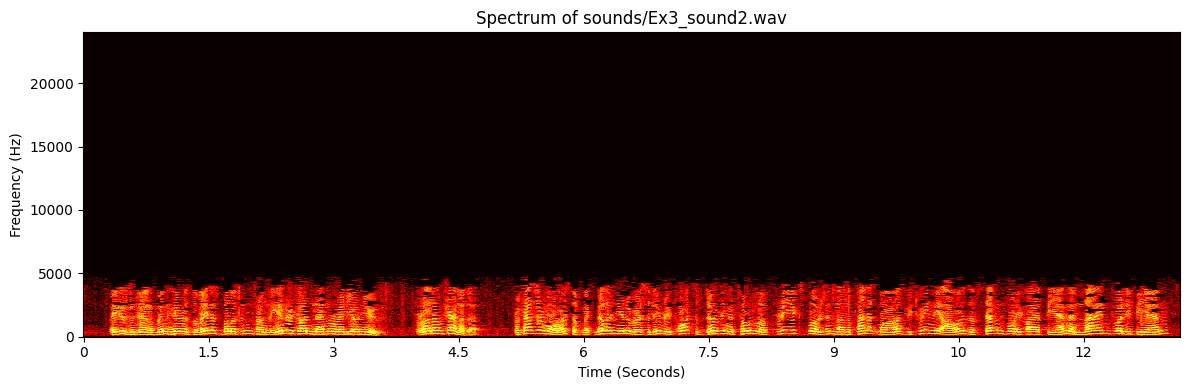

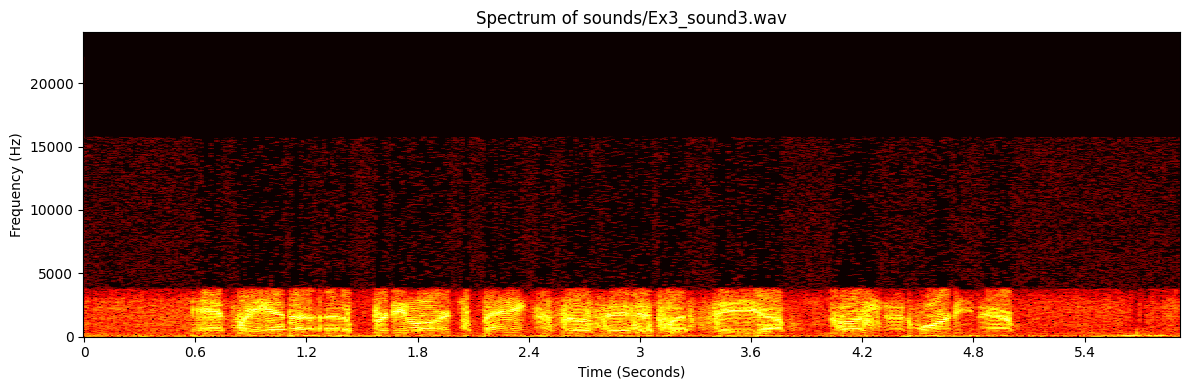

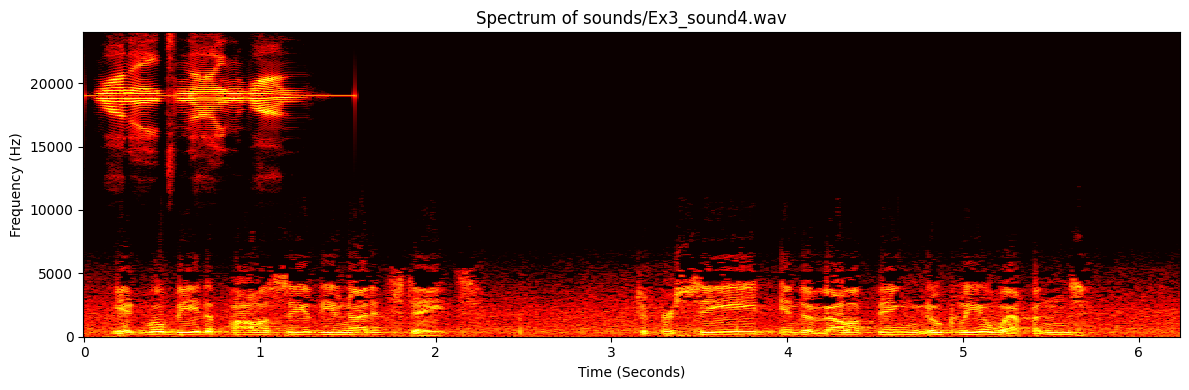

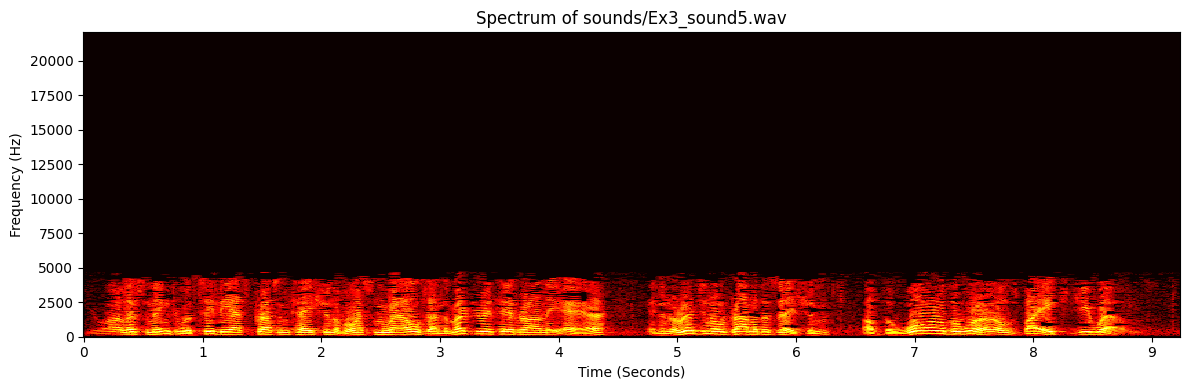

In [255]:
for audio_file in audio_files:
    # Load the audio file into an array and get the sample rate
    audio, sr = librosa.load(audio_file, sr=None)

    show_spectogram(audio, sr)

Ex3_sound4.wav contains suspicious information in the ultrasonic range that mirrored around 19kHz. This could be a carrier frequency for amplitude modulation. And such mirroring is a typical sign of amplitude modulation. Let's check it:

In [256]:
audio, sr = librosa.load("sounds/Ex3_sound4.wav", sr=None)

For the sake of clarity, let's drop all the frequencies below 10kHz using a high-pass filter:

In [257]:
cutoff_freq = 10000 # 10 kHz
filtered_audio = high_pass_filter(audio, sr, cutoff_freq)

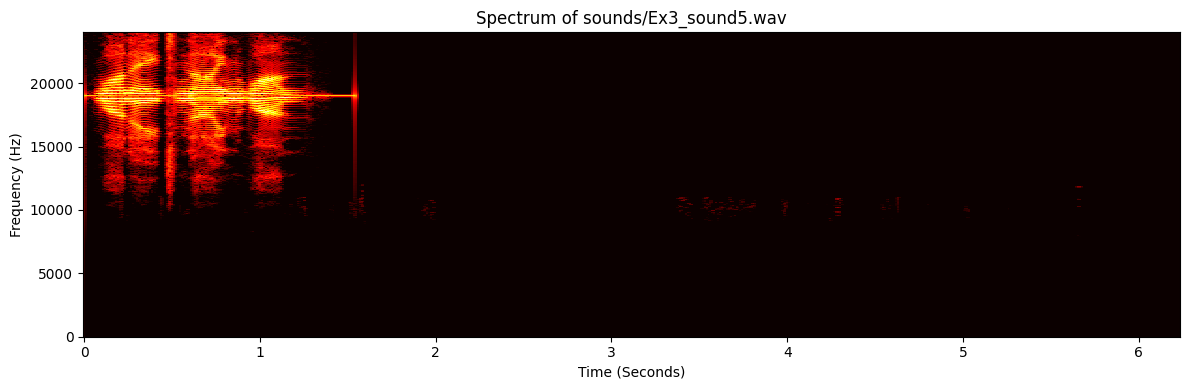

In [258]:
show_spectogram(filtered_audio, sr)

Looks great, now let's try to demodulate the signal. We can use the Hilbert transform to extract the envelope of the signal:

In [259]:
envelope = np.abs(signal.hilbert(filtered_audio))



Now, normalize the envelope:

In [260]:
envelope /= np.max(envelope)


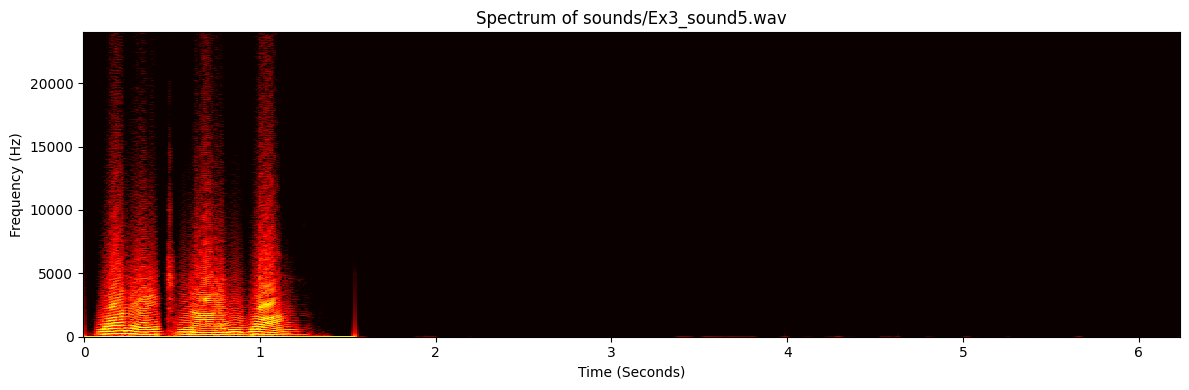

In [261]:
show_spectogram(envelope, sr)

The decrypted message is "1891":

In [262]:
Audio(data=envelope, rate=sr)

END of my code